In [52]:
# import pandas as pd 
# df = pd.read_json('./lammps.json')
import json

f = open('./eff_in.json')
d = json.load(f)
f.close()

In [53]:
cubeside_d = {1: 'xsmall', 6: 'small', 24: 'medium', 672: 'large'} 
# cubeside_d[24]

In [54]:
print(d)

{'session_info': {'cmdline': '/users/piccinal/reframe.git/bin/reframe -C /users/piccinal/reframe.git/config/cscs.py --skip-system-check --system dom:gpu -p PrgEnv-gnu --keep-stage-files --prefix=/scratch/snx3000tds/piccinal --report-file /users/piccinal/eff.json --performance-report -v -c test2.py -r -n SphExa_MPI_Check*', 'config_file': '/users/piccinal/reframe.git/config/cscs.py', 'data_version': '1.0', 'hostname': 'dom101', 'prefix_output': '/scratch/snx3000tds/piccinal/output', 'prefix_stage': '/scratch/snx3000tds/piccinal/stage', 'user': 'piccinal', 'version': '3.2-dev0 (rev: 0a4dc520)', 'workdir': '/apps/common/UES/sandbox/jgp/hpctools.git/AURELIEN/SPH-EXA_mini-app.git/scripts/reframe/DEBUGJG/TESTJG_DEPS2', 'time_start': '2020-07-28T21:28:26+0200', 'time_end': '2020-07-28T21:29:04+0200', 'time_elapsed': 38.192410469055176, 'num_cases': 3, 'num_failures': 0}, 'runs': [{'num_cases': 3, 'num_failures': 0, 'runid': 0, 'testcases': [{'build_stderr': 'rfm_SphExa_MPI_Check_1_build.err',

In [55]:
type(d)

dict

In [56]:
d.keys()

dict_keys(['session_info', 'runs'])

In [57]:
type(d['runs'])

list

In [58]:
len(d['runs'])

1

In [59]:
d['runs'][0].keys() # ['perfvars']

dict_keys(['num_cases', 'num_failures', 'runid', 'testcases'])

In [60]:
d['runs'][0]['testcases'][0].keys()

dict_keys(['build_stderr', 'build_stdout', 'description', 'environment', 'fail_reason', 'fail_phase', 'jobid', 'job_stderr', 'job_stdout', 'name', 'maintainers', 'nodelist', 'outputdir', 'perfvars', 'result', 'stagedir', 'scheduler', 'system', 'tags', 'time_compile', 'time_performance', 'time_run', 'time_sanity', 'time_setup', 'time_total'])

In [61]:
type(d['runs'][0]['testcases'][0]['perfvars'])

list

In [66]:
for ii in range(len(d['runs'][0]['testcases'])):
    print(d['runs'][0]['testcases'][ii]['name'])

SphExa_MPI_Check_1
SphExa_MPI_Check_6
SphExa_MPI_Check_24


In [67]:
len(d['runs'][0]['testcases'][0]['perfvars'])

13

In [35]:
d['runs'][0]['testcases'][0]['perfvars'][0:2]

[{'name': 'Elapsed',
  'reference': 0,
  'thres_lower': None,
  'thres_upper': None,
  'unit': 's',
  'value': 0.8846},
 {'name': '_Elapsed',
  'reference': 0,
  'thres_lower': None,
  'thres_upper': None,
  'unit': 's',
  'value': 2}]

In [36]:
d['runs'][0]['testcases'][0]['perfvars'][0].keys()

dict_keys(['name', 'reference', 'thres_lower', 'thres_upper', 'unit', 'value'])

In [37]:
d['runs'][0]['testcases'][0]['perfvars'][0]['name']

'Elapsed'

In [38]:
d['runs'][0]['testcases'][0]['perfvars'][0]['value']

0.8846

In [39]:
type(d['runs'][0]['testcases'][0]['perfvars'][0])

dict

In [40]:
d['runs'][0]['testcases'][0]['perfvars'][0].items()

dict_items([('name', 'Elapsed'), ('reference', 0), ('thres_lower', None), ('thres_upper', None), ('unit', 's'), ('value', 0.8846)])

# create dict:

In [68]:
row = {}
for ii in range(len(d['runs'][0]['testcases'])):
    dd = d['runs'][0]['testcases'][ii]
    print(d['runs'][0]['testcases'][ii]['name'], dd['name'])

SphExa_MPI_Check_1 SphExa_MPI_Check_1
SphExa_MPI_Check_6 SphExa_MPI_Check_6
SphExa_MPI_Check_24 SphExa_MPI_Check_24


In [82]:
row = {}
for ii in range(len(d['runs'][0]['testcases'])):
    dd = d['runs'][0]['testcases'][ii]    
    prgenv_ = dd['environment']
    prgmodel_ = dd['name']
    ll = len(dd['perfvars'])
    #print(prgenv_, prgmodel_)
    for lll in range(ll):       
        name_ = dd['perfvars'][lll]['name']
        #value_ = d['runs'][0]['testcases'][0]['perfvars'][lll]['value']
        #unit_ = d['runs'][0]['testcases'][0]['perfvars'][lll]['unit']    
        if name_ == 'Elapsed':        
            #elapsed_ = d['runs'][0]['testcases'][0]['perfvars'][lll]['value']
            elapsed_ = dd['perfvars'][lll]['value']
        if name_ == 'mpi_ranks':
            mpi_ = dd['perfvars'][lll]['value']
        if name_ == 'cubeside':
            cubeside_ = dd['perfvars'][lll]['value']
        if name_ == 'steps':
            steps_ = dd['perfvars'][lll]['value']
            avg_elapsed_ = elapsed_ / ( steps_ + 1 )
        if name_ == 'Total Neighbors':
            total_neighb_ = dd['perfvars'][lll]['value']
        if name_ == 'Avg neighbor count per particle':
            avg_neighb_ = dd['perfvars'][lll]['value']
        if name_ == 'Total energy':
            total_energy = dd['perfvars'][lll]['value']
        if name_ == 'Internal energy':
            int_energy = dd['perfvars'][lll]['value']
            title_ = cubeside_d[mpi_] + '-' + \
                     prgmodel_.split('_')[1] + '-' + \
                     prgenv_.replace('PrgEnv-', '')
        #row[title_] = [total_neighb_, avg_neighb_, total_energy, int_energy]
            row[title_] = [avg_elapsed_]
            print(title_,
                  elapsed_,
                  total_neighb_, avg_neighb_,
                  total_energy, int_energy)    

xsmall-MPI-gnu 0.8846 6190320.0 229.0 20811200000.0 1000000.0
small-MPI-gnu 0.5223 6445844.0 238.5 20811200000.0 999945.5
medium-MPI-gnu 10.031 248584201.66666666 248.0 20832300000.0 939592.3333333334


In [83]:
row

{'xsmall-MPI-gnu': [0.8846],
 'small-MPI-gnu': [0.26115],
 'medium-MPI-gnu': [3.343666666666667]}

In [73]:
rows_labels = list(row.keys())
rows_labels

['xsmall-MPI-gnu', 'small-MPI-gnu', 'medium-MPI-gnu']

In [74]:
import numpy as np
list_of_lists = [row[k] for k in row.keys()]
myplt_data = np.array(list_of_lists)
print('myplt_data=', myplt_data)

myplt_data= [[ 0.8846]
 [ 0.5223]
 [10.031 ]]


In [75]:
d['runs'][0]['testcases'][0]['perfvars'][lll]

{'name': 'Internal energy',
 'reference': 0,
 'thres_lower': None,
 'thres_upper': None,
 'unit': 'erg',
 'value': 1000000.0}

In [76]:
d['runs'][0]['testcases'][0]['environment']

'PrgEnv-gnu'

# PLOT

In [77]:
from jg import *

In [78]:
import numpy as np                                                              
import matplotlib                                                               
# import matplotlib_terminal                                                      
import matplotlib.pyplot as plt                                                 
import sys                    

In [91]:
#columns_labels = ['Total Neighbors', 'Avg neighbor per particle',
#                  'Total energy', 'Internal energy']
#columns_labels = ['Elapsed']
columns_labels = ['xsmall']
columns_labels = ['xsmall', 'small']
myplt_data= [[ 0.8846, 0.8846],
 [ 0.5223, 0.8846], 
 [10.031, 11 ]]

AttributeError: 'list' object has no attribute 'shape'

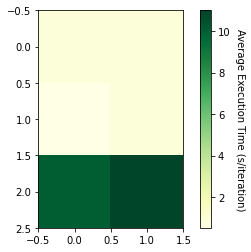

In [92]:
fig, ax = plt.subplots()
# im, cbar = heatmap(myplt_data, short_rows_labels, columns_labels, ax=ax,
im, cbar = heatmap(myplt_data, rows_labels, columns_labels, ax=ax,
                   cmap="YlGn", cbarlabel="Average Execution Time (s/iteration)")
                   # cmap="YlGn", cbarlabel="Metrics [count|erg]")
texts = annotate_heatmap(im, valfmt="{x:.1f} s")
fig.tight_layout()
plt.show()       
#ok plt.savefig('heatmap_matplot_sqpatch.png')
plt.close()

# old

In [ ]:
[ vv for kk,vv in dd.items() if kk.startswith('check')]

In [ ]:
for kk,vv in dd.items():
    if kk.startswith('check'):
        print("%s = %s" % (kk,vv))

In [ ]:
dd['check_perf_value'], dd['check_perf_ref'], dd['check_perf_unit']

In [ ]:
ll = list(dd.keys())
ll.sort()
ll

In [ ]:
f = open('./gmx.json')
dg = json.load(f)
f.close()

In [ ]:
ddgl = dg['_source']
ddgl['check_perf_value'], ddgl['check_perf_ref'], ddgl['check_perf_unit']

In [ ]:
ddgl2 = list(ddgl.keys())
ddgl2

In [ ]:
ddgl2.sort()

In [ ]:
ddgl2[1:16]

In [ ]:
ll[1:16]

In [ ]:
ddgl2[1:16] == ll[1:16]

In [ ]:
for i in range(16):
    print(ddgl2[i], ll[i], ddgl2[i] == ll[i])